<a href="https://colab.research.google.com/github/kishore-github1/CNN-based-mango-leaf-disease-classification/blob/main/mango_leaf_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
directory_root = "/content/gdrive/MyDrive/Dataset"

In [ ]:
IMAGE_SIZE = 240
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 25

In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    directory = directory_root,
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 4006 files belonging to 8 classes.


In [ ]:
classes = dataset.class_names
classes

['Anthracnose',
 'Bacterial Canker',
 'Cutting Weevil',
 'Die Back',
 'Gall Midge',
 'Healthy',
 'Powdery Mildew',
 'Sooty Mould']

In [ ]:
len(dataset)

126

In [ ]:
def get_dataset_partitions_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):

    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size,seed = 12)

    train_size = int(train_split * ds_size)
    val_size = int(val_split *ds_size)

    train_ds = ds.take(train_size)

    val_ds = ds.skip(train_size).take(val_size)
    test_ds= ds.skip(train_size).take(val_size)


    return train_ds,val_ds,test_ds

In [ ]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [ ]:
len(train_ds)

100

In [ ]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.Rescaling(1.0/255)
])

In [ ]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])

In [ ]:
input_shape = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes = 8

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(16, 3, padding='same',activation='relu'),
    layers. MaxPooling2D(),
    layers.Conv2D (32, 3, padding='same', activation='relu'),
    layers. MaxPooling2D(),
    layers. Dropout (0.25),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers. MaxPooling2D(),
    layers. Dropout (0.25),
    layers.Conv2D (128, 3, padding='same', activation='relu'),
    layers. MaxPooling2D(),
    layers. Dropout (0.25),
    layers. Flatten(),
    layers. Dense(256, activation='relu'),
    layers. Dense(8, activation='softmax')
])

model.build(input_shape = input_shape)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 240, 240, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 240, 240, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 240, 240, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2  (32, 120, 120, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 120, 120, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 60, 60, 32)          0         
 g2D)                                                 

In [ ]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics = ['accuracy']
)

In [ ]:

history = model.fit(
    train_ds,
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    verbose = 1,
    validation_data = val_ds
)

Epoch 1/25
100/100 [==============================] - 527s 184ms/step - loss: 2.0768 - accuracy: 0.2131 - val_loss: 1.6450 - val_accuracy: 0.4740
Epoch 2/25
100/100 [==============================] - 29s 179ms/step - loss: 1.4855 - accuracy: 0.4566 - val_loss: 1.3009 - val_accuracy: 0.5078
Epoch 3/25
100/100 [==============================] - 30s 186ms/step - loss: 1.1495 - accuracy: 0.5419 - val_loss: 1.4628 - val_accuracy: 0.4453
Epoch 4/25
100/100 [==============================] - 30s 178ms/step - loss: 1.0070 - accuracy: 0.5986 - val_loss: 0.8339 - val_accuracy: 0.7214
Epoch 5/25
100/100 [==============================] - 38s 265ms/step - loss: 0.6751 - accuracy: 0.7391 - val_loss: 0.5807 - val_accuracy: 0.7969
Epoch 6/25
100/100 [==============================] - 38s 265ms/step - loss: 0.5310 - accuracy: 0.7867 - val_loss: 1.4878 - val_accuracy: 0.5365
Epoch 7/25
100/100 [==============================] - 30s 178ms/step - loss: 0.5853 - accuracy: 0.7845 - val_loss: 0.7781 - val_a

In [ ]:
scores = model.evaluate(test_ds)

12/12 [==============================] - 13s 19ms/step - loss: 0.7159 - accuracy: 0.8229


Actual:  Die Back
1/1 [==============================] - 0s 147ms/step
Predicted:  Die Back


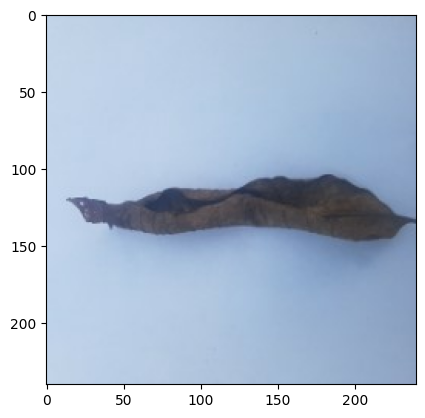

In [ ]:
import numpy as np

for images_batch ,labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0]

    plt.imshow(first_image)
    print("Actual: ",classes[first_label])

    batch_prediction = model.predict(images_batch)
    print("Predicted: ",
          classes[np.argmax(batch_prediction[0])])


In [ ]:

model.save("my_model1.keras")
